In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [2]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


In [7]:
file = "call.csv"
df = pd.read_csv(file, sep="\t")
df.head()

,TYPE,VALUE,ERROR
0,DIRECT,3.92397,0.000000
1,DIRECT,4.90321,0.692428
2,DIRECT,5.46016,0.647990
3,DIRECT,5.09341,0.580578
4,DIRECT,5.24773,0.484538


KeyError: 'type'

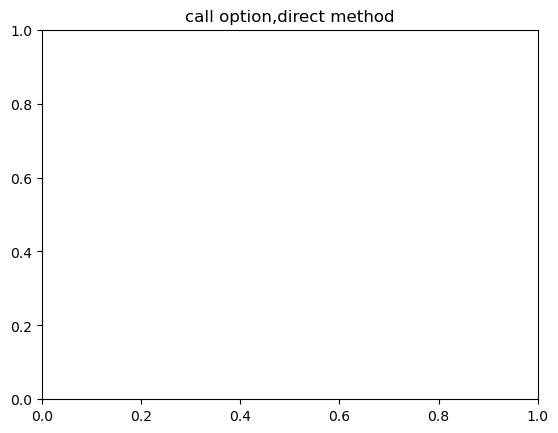

In [10]:
plt.figure()
type = "DIRECT"
plt.title('call option,direct method')
plt.errorbar(df[df['type']==type]['VALUE'],yerr=df['ERROR'])
plt.hlines(call, 0, 100, colors='r')
plt.grid()

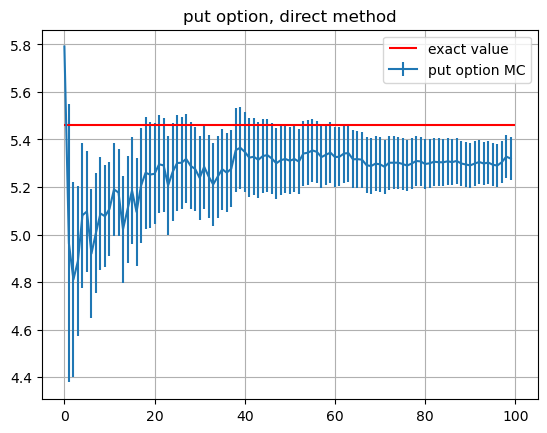

In [12]:
plt.title('put option, direct method')
plt.errorbar(df['id'],df['P'],yerr=df['P_err'], label='put option MC')
plt.hlines(put, 0, 100, colors='r', label='exact value')
plt.legend()
plt.grid()
plt.show()

In [6]:
file = "prices1.csv"
df = pd.read_csv(file, sep="\t", names=["id","C","C_err","P","P_err"])
df.head()

,id,C,C_err,P,P_err
0,0,13.8576,0.000000,5.79103,0.000000
1,1,13.9251,0.047704,4.96315,0.585401
2,2,13.9126,0.033393,4.81090,0.409586
3,3,13.4097,0.436267,4.88860,0.314473
4,4,13.8288,0.512227,5.08097,0.304789


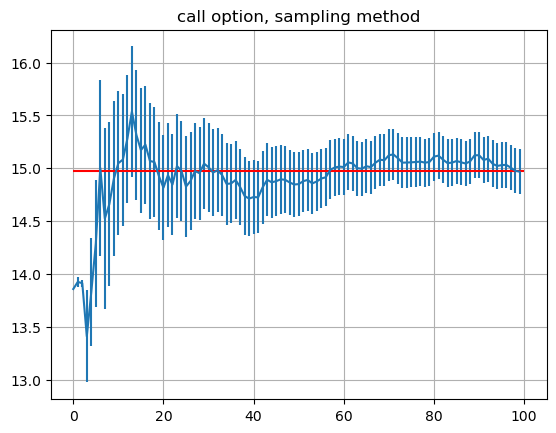

In [14]:
plt.figure()
plt.title('call option, sampling method')
plt.errorbar(df['id'],df['C'],yerr=df['C_err'])
plt.hlines(call, 0, 100, colors='r')
plt.grid()


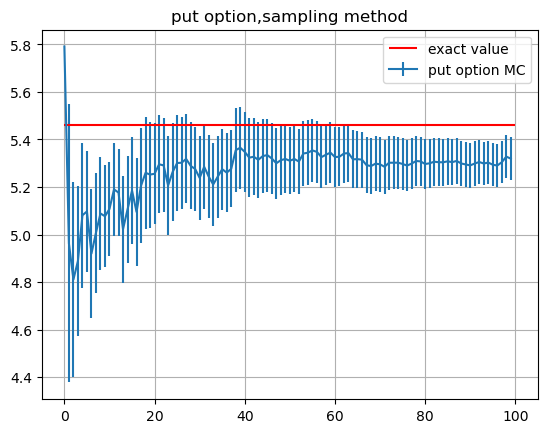

In [15]:
plt.title('put option,sampling method')
plt.errorbar(df['id'],df['P'],yerr=df['P_err'], label='put option MC')
plt.hlines(put, 0, 100, colors='r', label='exact value')
plt.legend()
plt.grid()
plt.show()